# Stacked denoising autoencoder

This notebook trains a stacked, denoising autoencoder on the shapes dataset.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%env MODEL_PATH="/home/simon/src/models"
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")

env: MODEL_PATH="/home/simon/src/models"


In [2]:
from deep_clustering.models.cae import Cae


In [3]:
%pwd

'/home/simon/src/deep_clustering/notebooks'

In [4]:
import torch
import torch.random as rnd

In [5]:
import torch
import torch.optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from deep_clustering.data import Shapes

cae = Cae("cae", 1, 32, [(32, 1), (32, 1), (32, 1)])
optimizer = torch.optim.Adam(cae.parameters())
data = Shapes("/home/simon/src/deep_clustering/data")
loss = F.mse_loss

In [6]:
cae.train(data, optimizer, loss, 1, None)

Epoch 0, batch 0: 0.2629980146884918
Epoch 0, batch 1: 0.2227359116077423
Epoch 0, batch 2: 0.19406038522720337
Epoch 0, batch 3: 0.1748252511024475
Epoch 0, batch 4: 0.16371305286884308
Epoch 0, batch 5: 0.14892607927322388
Epoch 0, batch 6: 0.14321327209472656
Epoch 0, batch 7: 0.13998359441757202
Epoch 0, batch 8: 0.11954604089260101
Epoch 0, batch 9: 0.11551712453365326
Epoch 0, batch 10: 0.10981809347867966
Epoch 0, batch 11: 0.10092320293188095
Epoch 0, batch 12: 0.08786963671445847
Epoch 0, batch 13: 0.08817661553621292
Epoch 0, batch 14: 0.07511070370674133
Epoch 0, batch 15: 0.07394281029701233
Epoch 0, batch 16: 0.06398751586675644
Epoch 0, batch 17: 0.06157064437866211
Epoch 0, batch 18: 0.057624366134405136
Epoch 0, batch 19: 0.051582708954811096
Epoch 0, batch 20: 0.04834388196468353
Epoch 0, batch 21: 0.04617089033126831
Epoch 0, batch 22: 0.04552660509943962
Epoch 0, batch 23: 0.04018574208021164
Epoch 0, batch 24: 0.03693602979183197
Epoch 0, batch 25: 0.037621840834617

KeyboardInterrupt: 

In [7]:
cl = cae.encoders[1].modules[0]
cl?dd

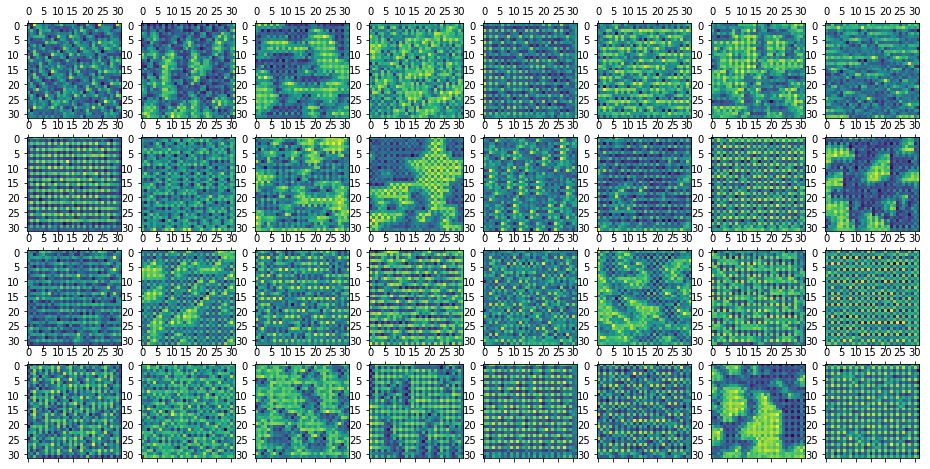

In [19]:
f, axs = plt.subplots(4, 8, figsize = (16, 8))
axs = axs.ravel()
for i in range(32):
    x = cae.visualize_filter(i, 100, 0.5)
    axs[i].matshow(x.detach().numpy()[0, 0, :, :])

In [20]:
cae._train_level = 1
cae.train(data, optimizer, loss, 1, None)

Epoch 0, batch 0: 0.13592909276485443
Epoch 0, batch 1: 0.0671551376581192
Epoch 0, batch 2: 0.04363106191158295
Epoch 0, batch 3: 0.03131997585296631
Epoch 0, batch 4: 0.02559458091855049
Epoch 0, batch 5: 0.02129039354622364
Epoch 0, batch 6: 0.020926587283611298
Epoch 0, batch 7: 0.02265390194952488
Epoch 0, batch 8: 0.018082717433571815
Epoch 0, batch 9: 0.017429938539862633
Epoch 0, batch 10: 0.016598569229245186
Epoch 0, batch 11: 0.01489908155053854
Epoch 0, batch 12: 0.013744582422077656
Epoch 0, batch 13: 0.014062613248825073
Epoch 0, batch 14: 0.012056959792971611
Epoch 0, batch 15: 0.01300085335969925
Epoch 0, batch 16: 0.01211625523865223
Epoch 0, batch 17: 0.010613343678414822
Epoch 0, batch 18: 0.009721643291413784
Epoch 0, batch 19: 0.009386847727000713
Epoch 0, batch 20: 0.008723949082195759
Epoch 0, batch 21: 0.008645243011415005
Epoch 0, batch 22: 0.009463806636631489
Epoch 0, batch 23: 0.008245695382356644
Epoch 0, batch 24: 0.007786755915731192
Epoch 0, batch 25: 0.

KeyboardInterrupt: 

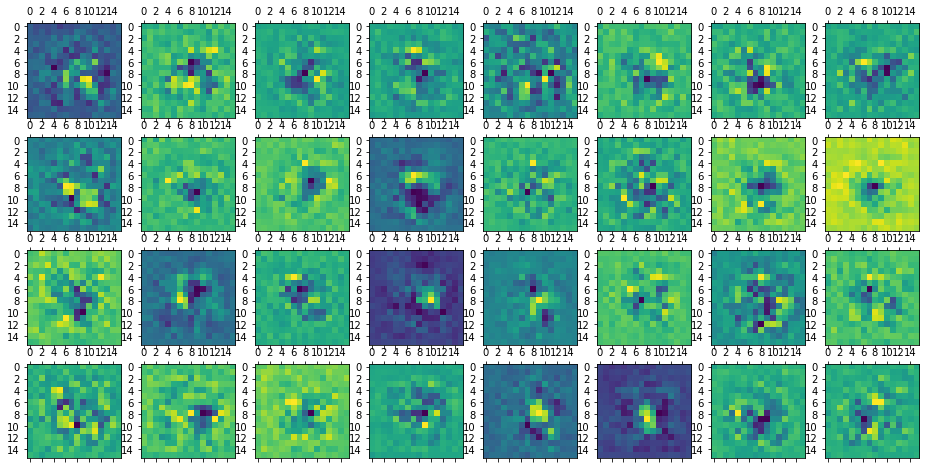

In [38]:
f, axs = plt.subplots(4, 8, figsize = (16, 8))
axs = axs.ravel()
cae._training = False
for i in range(32):
    x = cae.visualize_filter(i, 100, 0.5)
    axs[i].matshow(x.detach().numpy()[0, 0, :, :])

In [30]:
x = data[0].view(1, 1, 96, 96)
y = cae(x)[0]


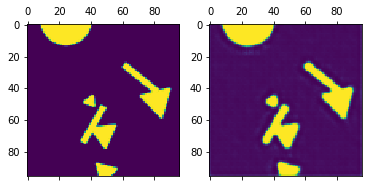

In [33]:
f, axs = plt.subplots(1, 2)

ax = axs[0]
ax.matshow(x.detach()[0, 0, :, :])
ax = axs[1]
ax.matshow(y.detach()[0, 0, :, :])

In [32]:
y

tensor([[[[0.1562, 0.0857, 0.0827,  ..., 0.0905, 0.0805, 0.1611],
          [0.0777, 0.0293, 0.0321,  ..., 0.0266, 0.0283, 0.0773],
          [0.0763, 0.0334, 0.0420,  ..., 0.0271, 0.0282, 0.0890],
          ...,
          [0.0981, 0.0293, 0.0245,  ..., 0.0267, 0.0214, 0.0627],
          [0.0924, 0.0325, 0.0284,  ..., 0.0238, 0.0233, 0.0730],
          [0.1812, 0.0962, 0.0799,  ..., 0.0705, 0.0684, 0.1400]]]],
       grad_fn=<SigmoidBackward>)

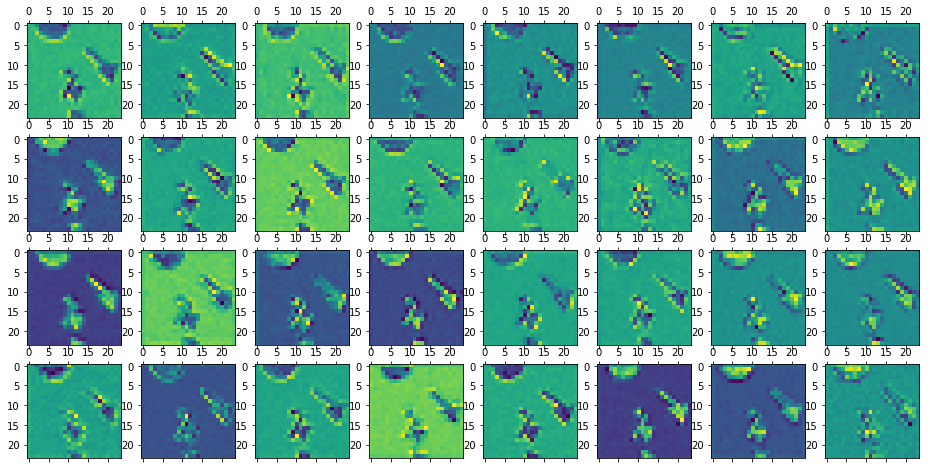

In [36]:
y = cae.encode(x)
f, axs = plt.subplots(4, 8, figsize = (16, 8))
axs = axs.ravel()
for i in range(32):
    axs[i].matshow(y.detach().numpy()[0, i, :, :])

In [35]:
y.size()

torch.Size([1, 32, 24, 24])

In [39]:
cae._train_level = 2
cae._training = True
cae.train(data, optimizer, loss, 1, None)

Epoch 0, batch 0: 0.20156900584697723
Epoch 0, batch 1: 0.07976523786783218
Epoch 0, batch 2: 0.05182358995079994
Epoch 0, batch 3: 0.04168169945478439
Epoch 0, batch 4: 0.03677193820476532
Epoch 0, batch 5: 0.03471680358052254
Epoch 0, batch 6: 0.031395263969898224
Epoch 0, batch 7: 0.030719585716724396
Epoch 0, batch 8: 0.033797621726989746
Epoch 0, batch 9: 0.028936348855495453
Epoch 0, batch 10: 0.02642069198191166
Epoch 0, batch 11: 0.024332795292139053
Epoch 0, batch 12: 0.02663462795317173
Epoch 0, batch 13: 0.0214484054595232
Epoch 0, batch 14: 0.020235257223248482
Epoch 0, batch 15: 0.02166283130645752
Epoch 0, batch 16: 0.021128548309206963
Epoch 0, batch 17: 0.017774291336536407
Epoch 0, batch 18: 0.01667400635778904
Epoch 0, batch 19: 0.01811971515417099
Epoch 0, batch 20: 0.016685916110873222
Epoch 0, batch 21: 0.015535682439804077
Epoch 0, batch 22: 0.014916079118847847
Epoch 0, batch 23: 0.014832045882940292
Epoch 0, batch 24: 0.015097873285412788
Epoch 0, batch 25: 0.01

KeyboardInterrupt: 

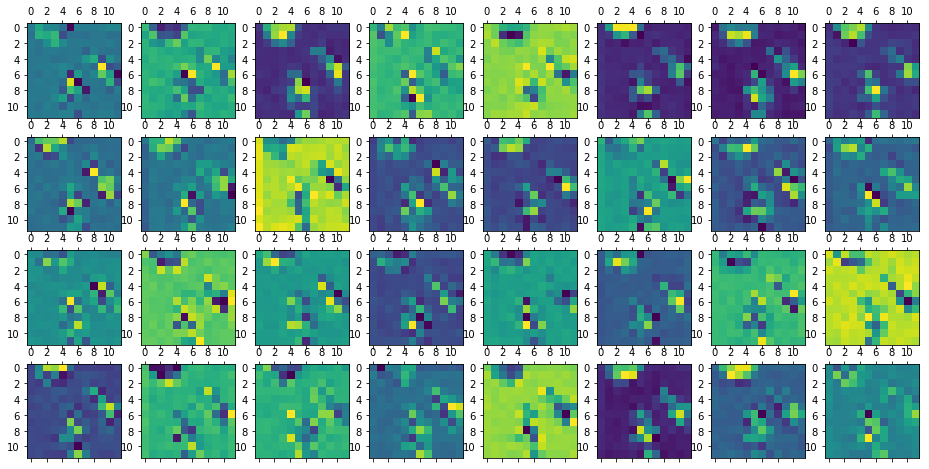

In [42]:
x = data[0].view(1, 1, 96, 96)
y = cae.encode(x)
f, axs = plt.subplots(4, 8, figsize = (16, 8))
axs = axs.ravel()
for i in range(32):
    axs[i].matshow(y.detach().numpy()[0, i, :, :])

tensor(-0.0499, grad_fn=<SumBackward0>)
tensor(3.0309, grad_fn=<SumBackward0>)
tensor(2.9930, grad_fn=<SumBackward0>)
tensor(2.8707, grad_fn=<SumBackward0>)
tensor(3.3951, grad_fn=<SumBackward0>)
tensor(3.2719, grad_fn=<SumBackward0>)
tensor(3.1203, grad_fn=<SumBackward0>)
tensor(3.1283, grad_fn=<SumBackward0>)
tensor(2.6718, grad_fn=<SumBackward0>)
tensor(3.1806, grad_fn=<SumBackward0>)
tensor(-0.0789, grad_fn=<SumBackward0>)
tensor(1.9695, grad_fn=<SumBackward0>)
tensor(2.2000, grad_fn=<SumBackward0>)
tensor(2.1592, grad_fn=<SumBackward0>)
tensor(2.2228, grad_fn=<SumBackward0>)
tensor(2.1938, grad_fn=<SumBackward0>)
tensor(2.3040, grad_fn=<SumBackward0>)
tensor(2.2824, grad_fn=<SumBackward0>)
tensor(2.0420, grad_fn=<SumBackward0>)
tensor(2.0057, grad_fn=<SumBackward0>)
tensor(0.2906, grad_fn=<SumBackward0>)
tensor(5.1520, grad_fn=<SumBackward0>)
tensor(4.8316, grad_fn=<SumBackward0>)
tensor(4.7480, grad_fn=<SumBackward0>)
tensor(4.7691, grad_fn=<SumBackward0>)
tensor(4.8333, grad_fn=

tensor(4.2572, grad_fn=<SumBackward0>)
tensor(-0.2702, grad_fn=<SumBackward0>)
tensor(4.4738, grad_fn=<SumBackward0>)
tensor(3.2735, grad_fn=<SumBackward0>)
tensor(3.5030, grad_fn=<SumBackward0>)
tensor(3.5348, grad_fn=<SumBackward0>)
tensor(3.8097, grad_fn=<SumBackward0>)
tensor(3.6556, grad_fn=<SumBackward0>)
tensor(3.9885, grad_fn=<SumBackward0>)
tensor(3.7719, grad_fn=<SumBackward0>)
tensor(3.7739, grad_fn=<SumBackward0>)
tensor(-0.1945, grad_fn=<SumBackward0>)
tensor(0.6910, grad_fn=<SumBackward0>)
tensor(0.9002, grad_fn=<SumBackward0>)
tensor(0.6200, grad_fn=<SumBackward0>)
tensor(0.5495, grad_fn=<SumBackward0>)
tensor(0.7282, grad_fn=<SumBackward0>)
tensor(0.3547, grad_fn=<SumBackward0>)
tensor(0.5085, grad_fn=<SumBackward0>)
tensor(0.6560, grad_fn=<SumBackward0>)
tensor(1.0133, grad_fn=<SumBackward0>)
tensor(0.1859, grad_fn=<SumBackward0>)
tensor(4.4096, grad_fn=<SumBackward0>)
tensor(5.2169, grad_fn=<SumBackward0>)
tensor(5.1665, grad_fn=<SumBackward0>)
tensor(4.6763, grad_fn=

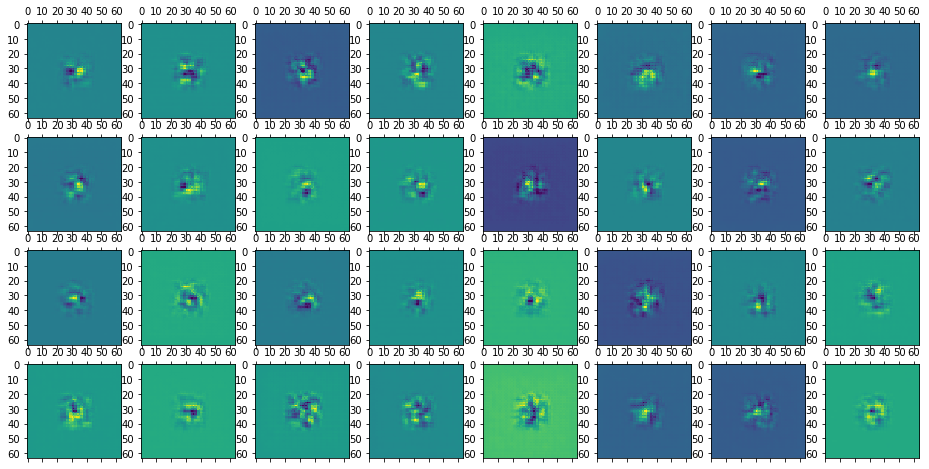

In [55]:
f, axs = plt.subplots(4, 8, figsize = (16, 8))
axs = axs.ravel()
cae._training = True
for i in range(32):
    x = cae.visualize_filter(i, 10, 0.1)
    axs[i].matshow(x.detach().numpy()[0, 0, :, :])

In [66]:
cae._train_level = 3
cae._training = True
cae.train(data, optimizer, loss, 1, None)

Epoch 0, batch 0: 0.11509796231985092
Epoch 0, batch 1: 0.03832489624619484
Epoch 0, batch 2: 0.028359565883874893
Epoch 0, batch 3: 0.02569078654050827
Epoch 0, batch 4: 0.02349366620182991
Epoch 0, batch 5: 0.02260916493833065
Epoch 0, batch 6: 0.020471669733524323
Epoch 0, batch 7: 0.01936683990061283
Epoch 0, batch 8: 0.02071033976972103
Epoch 0, batch 9: 0.01599552482366562
Epoch 0, batch 10: 0.01378010306507349
Epoch 0, batch 11: 0.01205246988683939
Epoch 0, batch 12: 0.012420501559972763
Epoch 0, batch 13: 0.011927680112421513
Epoch 0, batch 14: 0.009077666327357292
Epoch 0, batch 15: 0.010818387381732464
Epoch 0, batch 16: 0.011184762232005596
Epoch 0, batch 17: 0.009139228612184525
Epoch 0, batch 18: 0.008204011246562004
Epoch 0, batch 19: 0.009655018337070942
Epoch 0, batch 20: 0.00832629669457674
Epoch 0, batch 21: 0.007917642593383789
Epoch 0, batch 22: 0.008807510137557983
Epoch 0, batch 23: 0.007774661760777235
Epoch 0, batch 24: 0.00747343897819519
Epoch 0, batch 25: 0.0

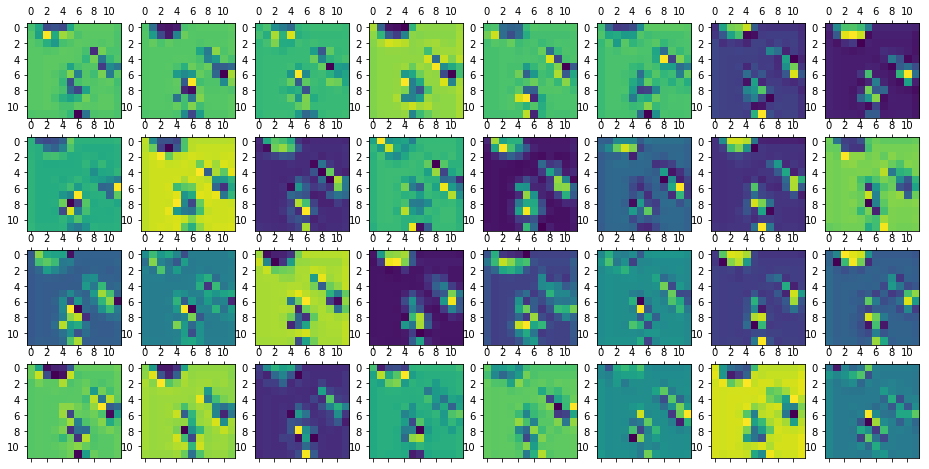

In [67]:
x = data[0].view(1, 1, 96, 96)
y = cae.encode(x)
f, axs = plt.subplots(4, 8, figsize = (16, 8))
axs = axs.ravel()
for i in range(32):
    axs[i].matshow(y.detach().numpy()[0, i, :, :])

In [62]:
y[0].size()

torch.Size([1, 1, 24, 24])

In [63]:
cae._train_level

3

In [64]:
len(cae.encoders)

3

tensor(-0.1873, grad_fn=<SumBackward0>)
tensor(1.6319, grad_fn=<SumBackward0>)
tensor(1.6319, grad_fn=<SumBackward0>)
tensor(1.6319, grad_fn=<SumBackward0>)
tensor(1.6319, grad_fn=<SumBackward0>)
tensor(1.6319, grad_fn=<SumBackward0>)
tensor(1.6319, grad_fn=<SumBackward0>)
tensor(1.6319, grad_fn=<SumBackward0>)
tensor(1.6319, grad_fn=<SumBackward0>)
tensor(1.6319, grad_fn=<SumBackward0>)
tensor(-0.2455, grad_fn=<SumBackward0>)
tensor(3.6952, grad_fn=<SumBackward0>)
tensor(3.6952, grad_fn=<SumBackward0>)
tensor(3.6952, grad_fn=<SumBackward0>)
tensor(3.6952, grad_fn=<SumBackward0>)
tensor(3.6952, grad_fn=<SumBackward0>)
tensor(3.6952, grad_fn=<SumBackward0>)
tensor(3.6952, grad_fn=<SumBackward0>)
tensor(3.6952, grad_fn=<SumBackward0>)
tensor(3.6952, grad_fn=<SumBackward0>)
tensor(0.0549, grad_fn=<SumBackward0>)
tensor(2.9484, grad_fn=<SumBackward0>)
tensor(2.9484, grad_fn=<SumBackward0>)
tensor(2.9484, grad_fn=<SumBackward0>)
tensor(2.9484, grad_fn=<SumBackward0>)
tensor(2.9484, grad_fn=

tensor(1.8384, grad_fn=<SumBackward0>)
tensor(1.8384, grad_fn=<SumBackward0>)
tensor(1.8384, grad_fn=<SumBackward0>)
tensor(1.8384, grad_fn=<SumBackward0>)
tensor(1.8384, grad_fn=<SumBackward0>)
tensor(1.8384, grad_fn=<SumBackward0>)
tensor(0.5302, grad_fn=<SumBackward0>)
tensor(6.8416, grad_fn=<SumBackward0>)
tensor(6.8416, grad_fn=<SumBackward0>)
tensor(6.8416, grad_fn=<SumBackward0>)
tensor(6.8416, grad_fn=<SumBackward0>)
tensor(6.8416, grad_fn=<SumBackward0>)
tensor(6.8416, grad_fn=<SumBackward0>)
tensor(6.8416, grad_fn=<SumBackward0>)
tensor(6.8416, grad_fn=<SumBackward0>)
tensor(6.8416, grad_fn=<SumBackward0>)
tensor(0.1301, grad_fn=<SumBackward0>)
tensor(3.9025, grad_fn=<SumBackward0>)
tensor(3.9025, grad_fn=<SumBackward0>)
tensor(3.9025, grad_fn=<SumBackward0>)
tensor(3.9025, grad_fn=<SumBackward0>)
tensor(3.9025, grad_fn=<SumBackward0>)
tensor(3.9025, grad_fn=<SumBackward0>)
tensor(3.9025, grad_fn=<SumBackward0>)
tensor(3.9025, grad_fn=<SumBackward0>)
tensor(3.9025, grad_fn=<S

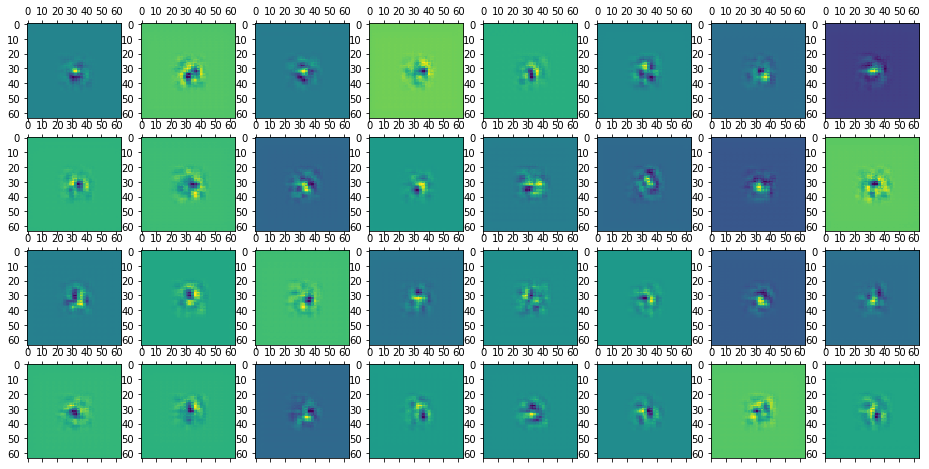

In [68]:
f, axs = plt.subplots(4, 8, figsize = (16, 8))
axs = axs.ravel()
cae._training = True
for i in range(32):
    x = cae.visualize_filter(i, 10, 0.1)
    axs[i].matshow(x.detach().numpy()[0, 0, :, :])